Project-2: Recognition of Objetcs Using CNN

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import keras

LOADING AND SPLITTING THE DATA

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 7s 0us/step


In [ ]:
print('Training Images: {}'.format(x_train.shape))
print('Testing Images: {}'.format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
print(x_train[0].shape)

(32, 32, 3)


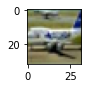

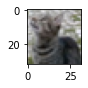

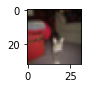

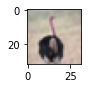

In [ ]:
for i in range(332,336):
  plt.subplots(figsize=(1,1))
  img=x_train[i]
  plt.imshow(img)
  plt.show()

PROCESSING THE DATA

In [ ]:
x_train = x_train.reshape(x_train.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
nclasses = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, nclasses)
y_test = np_utils.to_categorical(y_test, nclasses)
print("Shape after one-hot encoding: ", y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


BUILDING THE MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(250, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 30s 47ms/step - loss: 1.6282 - accuracy: 0.4017 - val_loss: 1.1641 - val_accuracy: 0.5863
Epoch 2/10
391/391 [==============================] - 18s 45ms/step - loss: 1.1370 - accuracy: 0.5955 - val_loss: 0.9454 - val_accuracy: 0.6649
Epoch 3/10
391/391 [==============================] - 17s 44ms/step - loss: 0.9445 - accuracy: 0.6697 - val_loss: 0.8331 - val_accuracy: 0.7145
Epoch 4/10
391/391 [==============================] - 17s 44ms/step - loss: 0.8168 - accuracy: 0.7130 - val_loss: 0.7691 - val_accuracy: 0.7342
Epoch 5/10
391/391 [==============================] - 17s 44ms/step - loss: 0.7332 - accuracy: 0.7443 - val_loss: 0.7333 - val_accuracy: 0.7461
Epoch 6/10
391/391 [==============================] - 17s 44ms/step - loss: 0.6590 - accuracy: 0.7684 - val_loss: 0.7028 - val_accuracy: 0.7608
Epoch 7/10
391/391 [==============================] - 17s 45ms/step - loss: 0.6160 - accuracy: 0.7855 - val_loss: 0.6852 - val_accuracy:

In [ ]:
classes = range(0,10)

names = ['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']
         
class_labels = dict(zip(classes, names))
batch = x_test[100:109]
labels = np.argmax(y_test[100:109], axis = -1)
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 183ms/step


In [ ]:
print(predictions)

[[2.33741321e-05 3.51984937e-07 1.82447769e-02 6.02548989e-03
  5.50653040e-01 9.59634036e-02 4.44099387e-05 3.29036921e-01
  3.61042839e-06 4.58277691e-06]
 [1.04963838e-03 1.76146321e-04 4.85839359e-02 1.15432724e-01
  2.49195821e-03 4.22668815e-01 6.31308779e-02 3.31656575e-01
  1.35260578e-02 1.28333259e-03]
 [1.22963693e-05 3.87136315e-05 8.31674552e-04 2.79407818e-02
  4.83605108e-04 8.05816799e-03 9.62571681e-01 2.60323832e-05
  3.11494041e-05 5.90195032e-06]
 [3.90527157e-06 6.37225753e-07 5.99726220e-04 9.39332485e-01
  1.36004332e-02 1.95514690e-03 4.44306694e-02 6.78600918e-05
  3.82680491e-06 5.19439436e-06]
 [1.20742402e-06 9.95409548e-01 5.85149151e-11 1.35506950e-09
  1.67850664e-10 7.79679307e-11 5.23759758e-10 2.91268343e-10
  1.09341072e-05 4.57831379e-03]
 [8.17488035e-06 9.95954752e-01 1.67122494e-08 2.35374564e-08
  1.52292989e-09 6.28353536e-10 7.46171658e-09 4.15829982e-10
  2.65971874e-04 3.77110415e-03]
 [4.26898479e-01 1.13830471e-03 2.20668510e-01 1.62860915e

In [ ]:
for image in predictions:
  print(np.sum(image))

1.0
1.0
1.0000001
0.9999999
0.99999994
1.0
0.99999994
1.0
0.99999994


In [ ]:
class_result = np.argmax(predictions, axis=-1)
print(class_result)

[4 5 6 3 1 1 0 6 8]


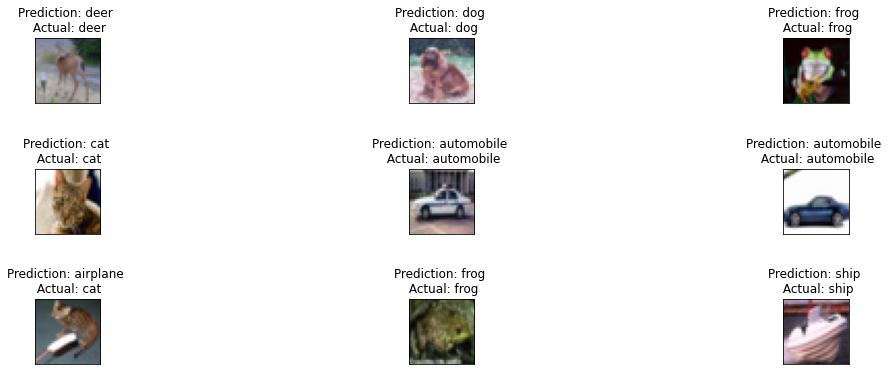

In [ ]:
fig, axs = plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
  for key,value in class_labels.items():
    if class_result[i]==key:
      title = 'Prediction: {} \n Actual: {}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  axs[i].imshow(img)
plt.show()